In [12]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import pandas as pd
from pfca.exp import viz_dimensional, generate_colormap
import matplotlib.pyplot as plt

In [2]:
#ROC plot code adapted from the following source : https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(y_test, y_score):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    lw = 2
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
#Load the datasets
X = np.load('./dataset/kmer_prob_features.npy')
Y = np.load('./dataset/kmer_labels.npy')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, stratify = Y)

In [5]:
print("No of train samples: ", len(x_train))
print("No of test samples: ", len(x_test))

No of train samples:  672
No of test samples:  288


In [6]:
rusboost = RUSBoostClassifier(n_estimators = 100, random_state=10)

In [14]:
rusboost.fit(x_train, y_train)

RUSBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=10, replacement=False,
                   sampling_strategy='auto')

In [15]:
#Running on test dataset
y_pred = rusboost.predict(x_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", (accuracy*100))

Test Accuracy:  70.83333333333334


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       144
           1       0.71      0.71      0.71       144

    accuracy                           0.71       288
   macro avg       0.71      0.71      0.71       288
weighted avg       0.71      0.71      0.71       288



In [78]:
print(confusion_matrix(y_test, y_pred))

[[103  41]
 [ 38 106]]


In [11]:
y_pred_train = rusboost.predict(x_train)

In [22]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy: ", (accuracy*100))

Train Accuracy:  86.90476190476191


In [79]:
n_positive = np.sum(y_test)

In [80]:
print("Positive class Accuracy: ",(106/n_positive))

Positive class Accuracy:  0.7361111111111112


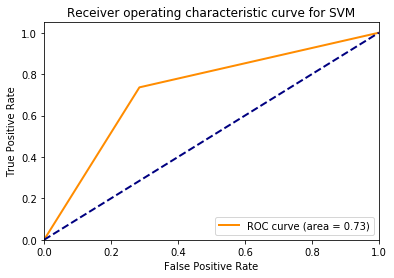

In [82]:
plot_roc_curve(y_test, y_pred)

In [7]:
#Dimensional Reduction
pos = []
neg = []
for i in range(X.shape[0]):
    if Y[i] == 0:
        neg.append(X[i,:])
    elif Y[i] == 1:
        pos.append(X[i,:])

In [8]:
pos = np.array(pos)
neg = np.array(neg)

In [9]:
pos.shape

(480, 64)

In [10]:
colormap, labels = generate_colormap(pos, 'Mulberry miRNA', color = [0,1,0])

In [11]:
clrmaps, lbls = generate_colormap(neg, 'Non-mulberry miRNA', color = [1,0,0], 
                                  c_matrix = colormap, l_matrix = labels)

In [12]:
feat = np.vstack((pos,neg))

(960, 2)


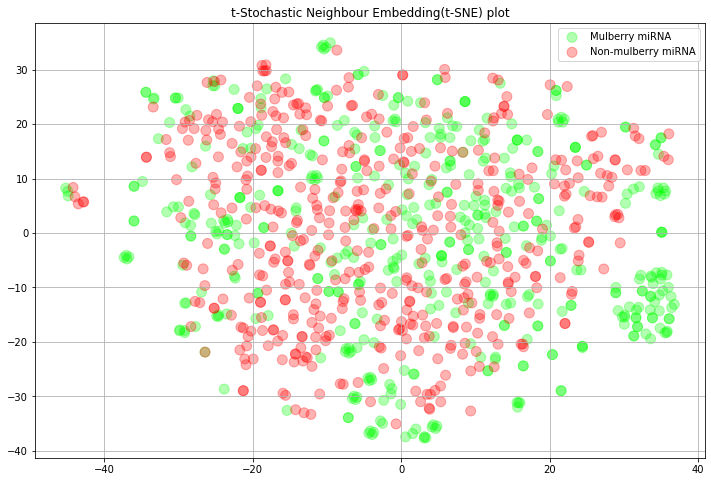

In [15]:
tsne_vec = viz_dimensional(feat, algo = 'tsne', colormap=clrmaps, labelmap=lbls, perplexity = 40)

(960, 2)


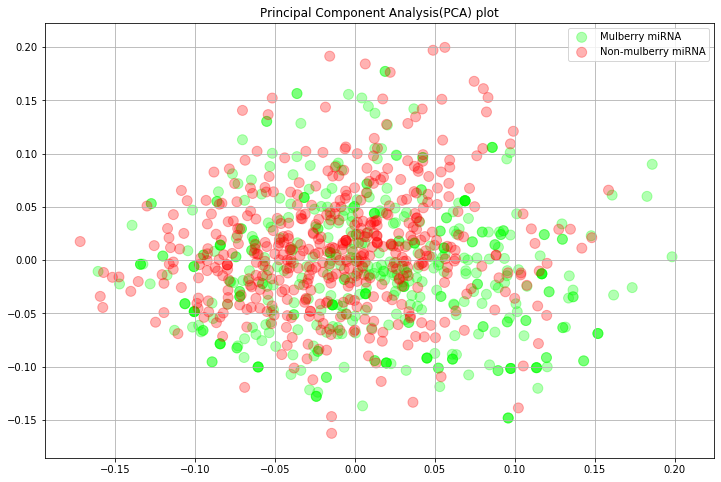

In [16]:
tsne_vec = viz_dimensional(feat, algo = 'pca', colormap=clrmaps, labelmap=lbls, perplexity = 40)

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [41]:
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [44]:
svc_clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [45]:
y_pred_svc = svc_clf.predict(x_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Test Accuracy (SVM): ", (accuracy*100))

Test Accuracy (SVM):  72.91666666666666


In [48]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       144
           1       0.75      0.69      0.72       144

    accuracy                           0.73       288
   macro avg       0.73      0.73      0.73       288
weighted avg       0.73      0.73      0.73       288



In [50]:
print(confusion_matrix(y_test, y_pred_svc))

[[111  33]
 [ 45  99]]


In [54]:
y_score = svc_clf.fit(x_train, y_train).decision_function(x_test)

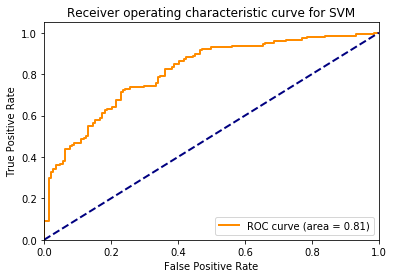

In [67]:
plot_roc_curve(y_test, y_score)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rand_forest = RandomForestClassifier(max_depth=2, random_state=0)

In [62]:
rand_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [63]:
y_pred_forest = rand_forest.predict(x_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred_forest)
print("Test Accuracy (Random Forests): ", (accuracy*100))

Test Accuracy (Random Forests):  68.75


In [65]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       144
           1       0.73      0.59      0.65       144

    accuracy                           0.69       288
   macro avg       0.69      0.69      0.68       288
weighted avg       0.69      0.69      0.68       288



In [69]:
print(confusion_matrix(y_test, y_pred_forest))

[[113  31]
 [ 59  85]]


In [71]:
y_score = rand_forest.fit(x_train, y_train).predict(x_test)

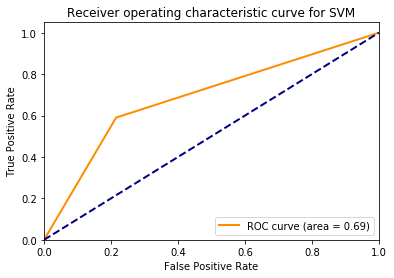

In [72]:
plot_roc_curve(y_test, y_score)